In [14]:
import pandas as pd
from pandas import json_normalize
import requests
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns
import numpy as np

In [15]:
competitions = requests.get("https://raw.githubusercontent.com/statsbomb/open-data/master/data/competitions.json") 
competitions = competitions.json()

In [16]:
for comp in competitions:
    print(comp['competition_name'],comp['season_name'],comp['competition_id'],comp['season_id'])

Champions League 2018/2019 16 4
Champions League 2017/2018 16 1
Champions League 2016/2017 16 2
Champions League 2015/2016 16 27
Champions League 2014/2015 16 26
Champions League 2013/2014 16 25
Champions League 2012/2013 16 24
Champions League 2011/2012 16 23
Champions League 2010/2011 16 22
Champions League 2009/2010 16 21
Champions League 2008/2009 16 41
Champions League 2006/2007 16 39
Champions League 2004/2005 16 37
Champions League 2003/2004 16 44
Champions League 1999/2000 16 76
FA Women's Super League 2019/2020 37 42
FA Women's Super League 2018/2019 37 4
FIFA World Cup 2018 43 3
La Liga 2019/2020 11 42
La Liga 2018/2019 11 4
La Liga 2017/2018 11 1
La Liga 2016/2017 11 2
La Liga 2015/2016 11 27
La Liga 2014/2015 11 26
La Liga 2013/2014 11 25
La Liga 2012/2013 11 24
La Liga 2011/2012 11 23
La Liga 2010/2011 11 22
La Liga 2009/2010 11 21
La Liga 2008/2009 11 41
La Liga 2007/2008 11 40
La Liga 2006/2007 11 39
La Liga 2005/2006 11 38
La Liga 2004/2005 11 37
NWSL 2018 49 3
Premier 

In [17]:
# lets explore the fifa world cup

competition_id = 43
season_id = 3

In [18]:
#load events of england v tunisia

matches = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/7537.json')
matches = matches.json()

#Convert json to dataframe

dfa = json_normalize(matches,sep ="_")

In [19]:
pd.set_option('display.max.columns', None)
pd.set_option('display.max.rows',None)

In [20]:
dfa.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,under_pressure,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,counterpress,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_end_location,pass_aerial_won,foul_won_defensive,dribble_outcome_id,dribble_outcome_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,shot_first_time,clearance_aerial_won,pass_backheel,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,block_save_block,injury_stoppage_in_chain,foul_committed_advantage,foul_won_advantage,shot_aerial_won,ball_recovery_recovery_failure,pass_through_ball,pass_technique_id,pass_technique_name,pass_cut_back,dribble_overrun,ball_recovery_offensive,pass_goal_assist
0,76faae7d-d24a-4909-865f-04d548a98ff4,1,1,00:00:00.000,0,0,1,0.000,35,Starting XI,777,Tunisia,1,Regular Play,777,Tunisia,4141.0,"[{'player': {'id': 5653, 'name': 'Mouez Hassen...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4e12aaff-de3a-4395-8222-d7ddaf004eeb,2,1,00:00:00.000,0,0,1,0.000,35,Starting XI,777,Tunisia,1,Regular Play,768,England,352.0,"[{'player': {'id': 3468, 'name': 'Jordan Pickf...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86b4ecba-df16-4832-98f7-da714d5ac496,3,1,00:00:00.000,0,0,1,NaN,18,Half Start,777,Tunisia,1,Regular Play,777,Tunisia,NaN,NaN,[baf8e339-e927-465b-ba18-355b85e3bf23],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,baf8e339-e927-465b-ba18-355b85e3bf23,4,1,00:00:00.000,0,0,1,NaN,18,Half Start,777,Tunisia,1,Regular Play,768,England,NaN,NaN,[86b4ecba-df16-4832-98f7-da714d5ac496],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [21]:
dfb = pd.DataFrame()
dfb['period'],dfb['location'],dfb['player_name'],dfb['shot_statsbomb_xg'],dfb['shot_end_location'],dfb['shot_type_name'],dfb['shot_outcome_name'] = dfa['period'],dfa['location'],dfa['player_name'],dfa['shot_statsbomb_xg'],dfa['shot_end_location'],dfa['shot_type_name'],dfa['shot_outcome_name']
dfb.head()

,period,location,player_name,shot_statsbomb_xg,shot_end_location,shot_type_name,shot_outcome_name
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN
4,1,"[60.0, 40.0]",Bamidele Alli,NaN,NaN,NaN,NaN


In [26]:
shots_taken_england = dfb.loc[(dfb['player_name']=='Harry Kane')]
shots_taken_england.head()

,period,location,player_name,shot_statsbomb_xg,shot_end_location,shot_type_name,shot_outcome_name
93,1,"[82.0, 49.0]",Harry Kane,NaN,NaN,NaN,NaN
94,1,"[82.0, 49.0]",Harry Kane,NaN,NaN,NaN,NaN
96,1,"[83.0, 43.0]",Harry Kane,NaN,NaN,NaN,NaN
103,1,"[83.0, 25.0]",Harry Kane,NaN,NaN,NaN,NaN
162,1,"[61.0, 15.0]",Harry Kane,NaN,NaN,NaN,NaN


In [23]:
#load dataframe of Alli and his passes

Alli_passes =dfa.loc[(dfa['player_name']=='Bamidele Alli') & (dfa['type_name']=='Pass')]
Alli_passes.head(10)

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_body_part_id,pass_body_part_name,pass_type_id,pass_type_name,under_pressure,carry_end_location,pass_switch,pass_outcome_id,pass_outcome_name,ball_receipt_outcome_id,ball_receipt_outcome_name,interception_outcome_id,interception_outcome_name,counterpress,duel_outcome_id,duel_outcome_name,duel_type_id,duel_type_name,pass_cross,pass_assisted_shot_id,pass_shot_assist,shot_statsbomb_xg,shot_end_location,shot_key_pass_id,shot_type_id,shot_type_name,shot_body_part_id,shot_body_part_name,shot_technique_id,shot_technique_name,shot_outcome_id,shot_outcome_name,shot_freeze_frame,goalkeeper_outcome_id,goalkeeper_outcome_name,goalkeeper_technique_id,goalkeeper_technique_name,goalkeeper_type_id,goalkeeper_type_name,goalkeeper_position_id,goalkeeper_position_name,goalkeeper_body_part_id,goalkeeper_body_part_name,goalkeeper_end_location,pass_aerial_won,foul_won_defensive,dribble_outcome_id,dribble_outcome_name,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_deflected,block_deflection,shot_first_time,clearance_aerial_won,pass_backheel,foul_committed_offensive,foul_committed_type_id,foul_committed_type_name,foul_committed_card_id,foul_committed_card_name,foul_committed_penalty,foul_won_penalty,block_save_block,injury_stoppage_in_chain,foul_committed_advantage,foul_won_advantage,shot_aerial_won,ball_recovery_recovery_failure,pass_through_ball,pass_technique_id,pass_technique_name,pass_cut_back,dribble_overrun,ball_recovery_offensive,pass_goal_assist
4,8aea2d39-7680-494f-9e9a-9940dbacf9f8,5,1,00:00:05.600,0,5,2,1.293,30,Pass,768,England,9,From Kick Off,768,England,NaN,NaN,[e832edc3-0c67-47d2-9309-12b8201e00be],"[60.0, 40.0]",3094.0,Bamidele Alli,15.0,Left Center Midfield,3244.0,John Stones,21.000000,3.141593,1.0,Ground Pass,"[39.0, 40.0]",40.0,Right Foot,65.0,Kick Off,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,394c4733-97da-419f-a551-29a4610a895f,115,1,00:01:45.413,1,45,6,1.000,30,Pass,768,England,4,From Throw In,768,England,NaN,NaN,"[8471f246-b5a0-4b13-b28b-c592b56f70eb, cbaf2de...","[96.0, 8.0]",3094.0,Bamidele Alli,15.0,Left Center Midfield,3336.0,Harry Maguire,9.219544,-2.922924,2.0,Low Pass,"[87.0, 6.0]",40.0,Right Foot,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,8b3f010d-d7c5-48f8-8206-159445a1b2de,137,1,00:02:08.640,2,8,6,0.560,30,Pass,768,England,4,From Throw In,768,England,NaN,NaN,"[15da8715-758a-49cc-aed1-c12f54fce570, 35bfe6d...","[114.0, 58.0]",3094.0,Bamidele Alli,15.0,Left Center Midfield,3233.0,Raheem Shaquille Sterling,15.132746,-1.438245,1.0,Ground Pass,"[116.0, 43.0]",40.0,Right Foot,NaN,NaN,True,NaN,NaN,9.0,Incomplete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,caef64ef-5e4f-403a-8a99-243490163733,144,1,00:02:11.600,2,11,6,0.773,30,Pass,768,England,4,From Throw In,768,England,NaN,NaN,[42c2ecd0-c3ad-4a49-8f19-777d2036d92d],"[117.0, 51.0]",3094.0,Ba

In [24]:
# convert the data to match the statsbomb pitch dimensions
for x in range(len(Alli_passes['id'])):
    Alli_passes['location'].iloc[x][0] = Alli_passes['location'].iloc[x][0]*1.2
    Alli_passes['location'].iloc[x][1] = Alli_passes['location'].iloc[x][1]*.8
    Alli_passes['pass_end_location'].iloc[x][0] = Alli_passes['pass_end_location'].iloc[x][0]*1.2
    Alli_passes['pass_end_location'].iloc[x][1] = Alli_passes['pass_end_location'].iloc[x][1]*.8

Text(0.5, 1.0, 'Dele Alli Pass Map')

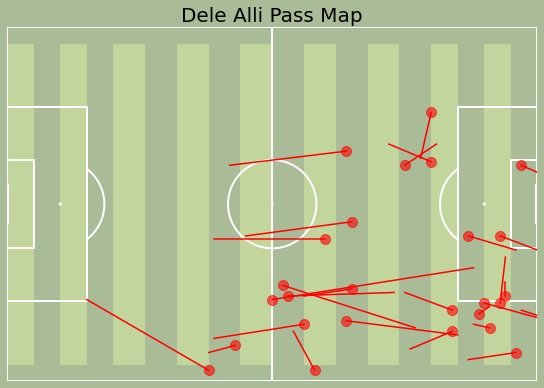

In [25]:
#load the football pitch for plotting Alli passes

fig, ax = plt.subplots(figsize = (13.5, 6.5))
fig.set_facecolor('#aabb97')
ax.patch.set_facecolor('#aabb97')
pitch = Pitch(pitch_type = 'statsbomb',orientation ='horizontal',view = 'half',positional = False,constrained_layout = False,tight_layout=False,pitch_color='#aabb97', line_color='white',
              stripe=True,stripe_color='#c2d59d')
  # optional stripes
pitch.draw(ax = ax)

for x in range(len(Alli_passes['id'])):
    Alli_passes['period'].iloc[x]==1 or Alli_passes['period'].iloc[x]==2
    plt.plot((Alli_passes['location'].iloc[x][0],Alli_passes['pass_end_location'].iloc[x][0]),(Alli_passes['location'].iloc[x][1],Alli_passes['pass_end_location'].iloc[x][1]), color = 'red')
    plt.scatter((Alli_passes['location'].iloc[x][0]),(Alli_passes['location'].iloc[x][1]), s = 100, color = 'red', alpha = 0.6)
    
plt.xlim(0,120)
plt.ylim(0,80)   
plt.title('Dele Alli Pass Map',color ='black',size = 20)